# Contours with Matplotlib: Part II | March 26
#### We've learned how to make contour plots with Matplotlib, but now it's time to move on to the next step: Accessing the data about our contours with Python.

For example, what if we want to count the number of contour lines in our dataset or see how many contour lines are closed i.e. circular (a technique for determining how many eddies are present)? We will tackle this problem today.

Starting with the usual suspects: Import statements! Go ahead and load in the packages you used for the last couple of contour activities.

In [1]:
#Import statements here
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
from netCDF4 import Dataset
import datetime

### We'll use the same X, Y and Z coordinates to create our contour map as last time. 
Chat with a partner to make sure you remember what each line is doing.

In [2]:
xlist = np.linspace(-6.0, 6.0, 9)
ylist = np.linspace(-6.0, 6.0, 11)
X, Y = np.meshgrid(xlist, ylist)

In [3]:
def f(x, y):
    return np.sqrt(x**2 + y**2)

In [4]:
Z = f(X,Y)

Let's create our contour map. This time, we will save it as a variable called `contour_set`.

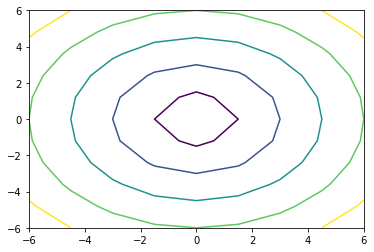

In [5]:
contour_set = plt.contour(X, Y, Z)

The contour variable is what Matplotlib calls a QuadContourSet. You can read more about it [here](https://matplotlib.org/api/contour_api.html#matplotlib.contour.QuadContourSet).

## Learning more about our contour set

In [6]:
print(contour_set)  #Contour is a "Quad Contour Set". 

We can access the different contour levels used to build the contour plot with `contour_set.levels`. 

In [7]:
#print out the different contour levels
print(contour_set.levels)


[1.5 3.  4.5 6.  7.5]


Remember that you can also manually change the levels that plt.contour uses, by including a list of levels as an argument. Try creating your own set of levels for this contour plot, with 1-unit spacings, and then remake the contour object.

In [8]:
levels = (np.arange(start=1.5, stop=8.5, step=1.5)) #your input here

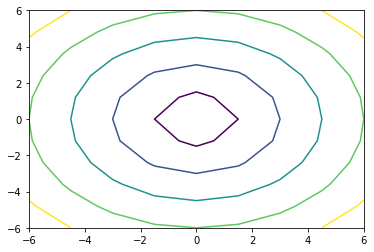

In [9]:
contour_set = plt.contour(X, Y, Z, levels)

In [10]:
print(contour_set.levels)

[1.5 3.  4.5 6.  7.5]


## How do we access our contour lines?

In addition to the levels, we can also access the actual data about the contour lines. Each circle in the contour plot above is stored in what Matplotlib calls a "LineCollection" — basically a group of different lines. In this case, there are individual LineCollections for each contour level -- so the firstLineCollection corresponds to the contour level 0, and so on.

Here is a drawing to help you understand how these contours are organized. Don't worry too much about understanding the different layers — you will learn by working through the rest of this notebook.

<img src="https://raw.githubusercontent.com/amnh/BridgeUP-STEM-Oceans-Six/master/photos/contours_collections.png?token=AmUbDgZ-zo_6OJ2Qyrwtz92LxiVjMFPZks5co5eKwA%3D%3D" width="700" />


We can access all of the contour lines with `contour_set.collections`. This returns a set of different LineCollection objects — as many objects as there are contour levels. 

In [11]:
#How to access
print(contour_set.collections)
contour_set.collections[1]

<a list of 5 mcoll.LineCollection objects>


**Check your understanding**: How many levels are there? How many objects are in `contour_set.collections`? What do the objects in `contour_set.collections` represent?

#1. 7 Levels
#2. 7 objects
#3. All of the different contour lines 

### Write your answer here:


In [12]:
## Write any code you want here

Each object/item in the LineCollections object contains all contour lines that have the same value. For example, the fourth item in contour_set.collections contains all contour lines with a value of `level[3]` (remember how funky counting is with indices?)

In [13]:
fourth_contour = contour_set.collections[3]
print(fourth_contour)

Within `fourth_contour`, there may be multiple contour lines. All of these contour lines share the same level value. 

Let's see how many are in this collection. Each contour is stored as a [Path in Matplotlib](https://matplotlib.org/api/path_api.html). To access them, we will use `fourth_contour.get_paths()`

In [14]:
fourth_contour_lines = fourth_contour.get_paths() #This is a list of contour lines
len(fourth_contour_lines) #This tells us how many contour lines we have

4

We have one contour line! 
**Check your understanding**: Does this make sense to you? How many contour lines would you expect to see based on your plot above?

### Write your explanation here:

We can extract the first one with `fourth_contour_lines[0]`

In [15]:
line = fourth_contour_lines[0]

## What is a Path in Matplotlib?

You won't need to worry about this too much, but Paths in Matplotlib are basically what they sound like — they store a collection of xy points that may make up a shape, such as a circle, a line or a contour! There are two arguments we need to pay attention to: `vertices` and `codes`.

In [16]:
print(line)

Path(array([[ 0.        , -6.        ],
       [-1.5       , -5.80827026],
       [-3.        , -5.18893649],
       [-3.55424125, -4.8       ],
       [-4.5       , -3.9485064 ],
       [-4.78823908, -3.6       ],
       [-5.49104552, -2.4       ],
       [-5.87805237, -1.2       ],
       [-6.        ,  0.        ]]), None)


The `vertices` argument is just an array containing the x and y coordinates of each point in the path.
The `code` argument may tell the computer how to draw the line or Path -- i.e., what order, and how to connect the points. In our case, `code` will always just be `None`

To access the vertices, which are what we really care about, we will use the `.vertices` command.

In [17]:
coords = line.vertices
print(coords)

[[ 0.         -6.        ]
 [-1.5        -5.80827026]
 [-3.         -5.18893649]
 [-3.55424125 -4.8       ]
 [-4.5        -3.9485064 ]
 [-4.78823908 -3.6       ]
 [-5.49104552 -2.4       ]
 [-5.87805237 -1.2       ]
 [-6.          0.        ]]


Notice that this is an array, containing the x-coordinates of the contour on the left and y-coordinates on the right. We can plot them and compare to the original plot.

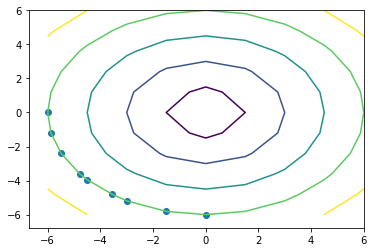

In [18]:
plt.contour(X,Y,Z, levels = contour_set.levels)
plt.scatter(coords[:,0], coords[:,1])

## Congrats! You now know how to use Matplotlib to look at individual contour lines for a contour plot! This will be very useful for our eddy identification algorithm.

### If you have finished this part, go to your labs folder and open up labs/matplotlib_contours_practice_part2.py and follow the instructions for more practice.